# Modern Earth Tutorial

In [1]:
# Standard imports
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
plt.rcParams.update({'font.size': 15})

The entire photochemical model is contained within the `EvoAtmosphere` class. Below we import `EvoAtmosphere` and print out the documentation

In [2]:
from photochem import EvoAtmosphere

EvoAtmosphere?

Docstring:     
A photochemical model which assumes no background gas. Once initialized,
this class can integrate an atmosphere forward in time to a steady
state. The model can also, optionally, self-consistently evolve climate for
terrestrial planets.
Init docstring:
Initializes the photochemical model.

Parameters
----------
mechanism_file : str
    Path to the reaction mechanism file (yaml format).
settings_file : str
    Path to the settings file (yaml format).
flux_file : str
    Path to the file describing the stellar flux.
atmosphere_txt : str
    Path to the file containing altitude, total number density, temperature, 
    eddy diffusion, initial concentrations of each gas (mixing ratios), 
    and particle radii.
data_dir : str, optional
    Path to the data directory containing photolysis cross sections and other data
    needed to run the model
File:           ~/mambaforge/envs/test/lib/python3.12/site-packages/photochem/_photochem.cpython-312-darwin.so
Type:           type


Initializing `EvoAtmosphere` requires four input files as described above and shown below. Open each of these files, and check them out to get a sense for the information they contain.

In [3]:
pc = EvoAtmosphere(
    "zahnle_earth.yaml", # Reactions & thermodynamics
    "input/settings.yaml", # Settings
    "input/Sun_now.txt", # The UV flux
    "input/atmosphere.txt" # Temperature, Kzz, and intial gas concentrations
)
pc.var.verbose = 0 # Turn off printing.
pc.var.atol = 1e-23 # integration absolute tolerance

Once initialized, a `EvoAtmosphere` object contains a complete description of the atmosphere and the input chemistry and settings. Information is mainly stored several objects within `EvoAtmosphere`:
1. `EvoAtmosphere.dat` - Data that does not change after initialization.
2. `EvoAtmosphere.var` - Data that can change between photochemical integrations.
4. `EvoAtmosphere.wrk` - Data that changes within each timestep of a photochemical integration

In [4]:
pc.dat?

Type:        PhotochemData
String form: <_photochem.PhotochemData object at 0x11764f290>
File:        ~/mambaforge/envs/test/lib/python3.12/site-packages/photochem/_photochem.cpython-312-darwin.so
Docstring:  
This class contains data which rarely changes once a photochemical model has
has been initialized.

In [5]:
# Print out all the species in the model
print(pc.dat.species_names)

['H2Oaer', 'CO2aer', 'S8aer', 'H2SO4aer', 'NH3aer', 'N2Oaer', 'C2H2aer', 'C2H4aer', 'C2H6aer', 'CH3CNaer', 'HCCCNaer', 'HCNaer', 'CH4aer', 'HCaer1', 'HCaer2', 'HCaer3', 'He', 'H', 'H2', 'H2O', 'OH', 'O', 'O2', 'CO', 'CO2', 'HCO', 'H2CO', 'C', 'CH', 'CH2', 'CH3', 'CH4', 'S', 'S2', 'S3', 'S4', 'S8', 'H2S', 'HS', 'SO', 'SO2', 'CS', 'CS2', 'OCS', 'CN', 'HCN', 'N', 'N2', 'NH', 'NH2', 'NH3', 'C2', 'C2H', 'C2H2', 'C2H4', 'NO', 'HNO', 'HO2', 'HNCO', 'N2O', 'H2O2', 'O3', 'NO2', 'NO3', 'SO3', 'HNO2', 'HNO3', 'H2SO4', 'HCl', 'Cl', 'Cl2', 'HOCl', 'N2H4', 'ClO', 'C2H6', 'CH3OH', 'CH2CO', 'CH3CHO', 'C3H4', 'C3H6', 'C4H2', 'C4H4', 'OClO', 'HCS', 'C2H3', 'C2H5', 'NCO', '1CH2', 'HCCO', 'NNH', 'HSO', 'CH3O', 'H2COH', 'H2CN', 'N2H2', 'C4H', 'HCNOH', 'C2H2OH', 'CH3CO', 'CH2CHO', 'C2H3OH', 'C2H4OH', 'CH3O2', 'HSO3', 'N2H3', 'NH2CO', 'HS4', 'C4H3', 'CH2N2', 'CH2CN', 'CH3CN', 'HCCCN', 'O1D', 'N2D', 'hv', 'M']


In [6]:
# Get a doc string for a variable in PhotochemData
from photochem._photochem import PhotochemData
PhotochemData.species_names?

Type:        getset_descriptor
String form: <attribute 'species_names' of '_photochem.PhotochemData' objects>
Docstring:  
List, shape (nsp+2). A list of the species in the model (particles and gases). 
The last two elements are 'hv' and 'M'.

In [7]:
pc.var?

Type:        PhotochemVars
String form: <_photochem.PhotochemVars object at 0x11764f250>
File:        ~/mambaforge/envs/test/lib/python3.12/site-packages/photochem/_photochem.cpython-312-darwin.so
Docstring:  
This class contains data that can change between independent
model integrations.

In [8]:
# The temperature profile (K)
print(pc.var.temperature)

[286.525 280.027 273.53  267.036 260.544 254.053 247.565 241.079 234.594
 228.112 221.632 216.773 216.773 216.773 216.773 216.773 216.773 216.773
 216.773 216.773 217.022 218.015 219.008 220.001 220.994 221.986 222.978
 223.97  224.961 225.952 226.943 227.933 229.258 231.918 234.688 237.458
 240.227 242.995 245.762 248.528 251.293 254.058 256.822 259.584 262.346
 265.107 267.868 270.282 270.627 270.627 270.627 270.455 268.216 265.462
 262.709 259.956 257.205 254.454 251.704 248.955 246.207 243.459 240.713
 237.967 235.223 232.479 229.736 226.993 224.252 221.512 218.772 216.033
 213.686 211.731 209.777 207.823 205.87  203.917 201.965 200.013 199.526
 199.526 199.526 199.526 199.526 199.526 199.526 199.526 199.526 199.526
 199.526 199.526 199.526 199.526 199.526 199.526 199.526 199.526 199.526
 199.526]


In [9]:
pc.wrk?

Type:            PhotochemWrkEvo
String form:     <_photochem.PhotochemWrkEvo object at 0x11764f490>
File:            ~/mambaforge/envs/test/lib/python3.12/site-packages/photochem/_photochem.cpython-312-darwin.so
Docstring:       <no docstring>
Class docstring:
This class contains data that changes during each step 
when integrating the photochemical model

In [10]:
# Gas/particle concentrations in molecules/cm^3
print(pc.wrk.usol.shape)

(112, 100)


Now, lets take a look at some gas concentrations in the model, right after initialization:

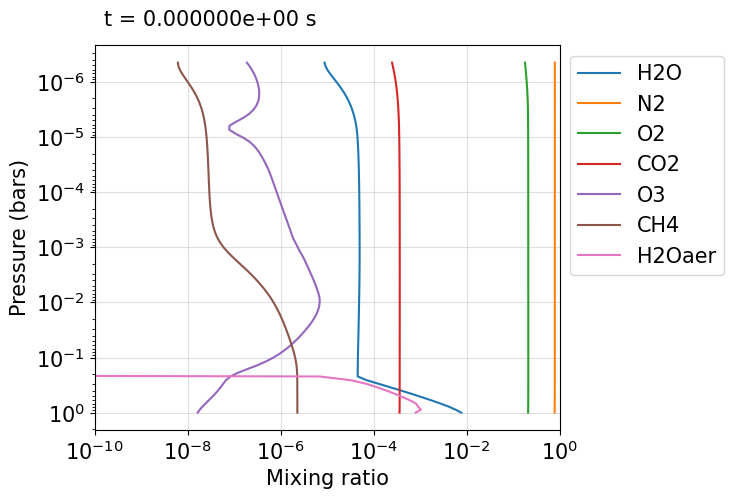

In [11]:
from utils import plot_atmosphere
    
fig, ax = plot_atmosphere(pc, species = ['H2O','N2','O2','CO2','O3','CH4','H2Oaer'])
plt.show()

The `EvoAtmosphere` object also has lots of methods (i.e. functions) for acting upon the atmosphere, as demonstrated below.

## Integrating an atmosphere forward in time

To integrate an atmosphere forward in time, you can use the `pc.initialize_robust_stepper` and `pc.robust_step` routines:

In [12]:
# Initialize an integrator with some initial conditions
initial_conditions = pc.wrk.usol
pc.initialize_robust_stepper(initial_conditions)

# Take a couple of integration steps
for i in range(5):
    give_up, converged = pc.robust_step()
    print('Current time in integration: %e s'%pc.wrk.tn)

Current time in integration: 1.000000e-06 s
Current time in integration: 7.984431e-05 s
Current time in integration: 8.682874e-04 s
Current time in integration: 8.752718e-03 s
Current time in integration: 8.759703e-02 s


The `pc.robust_step` method returns `give_up` and `converged`, which tell us whether we should give up and if the integration has converged to a steady state.

In [13]:
print(give_up)
print(converged)

False
False


We can integrate all the way to steady state with the function `pc.find_steady_state`. This function simply calls `pc.robust_step` until convergence or it is time to give up.

In [14]:
converged = pc.find_steady_state()
print(converged)

True


However, lets write a new method to find a steady state that plots the atmospheres composition along the way.

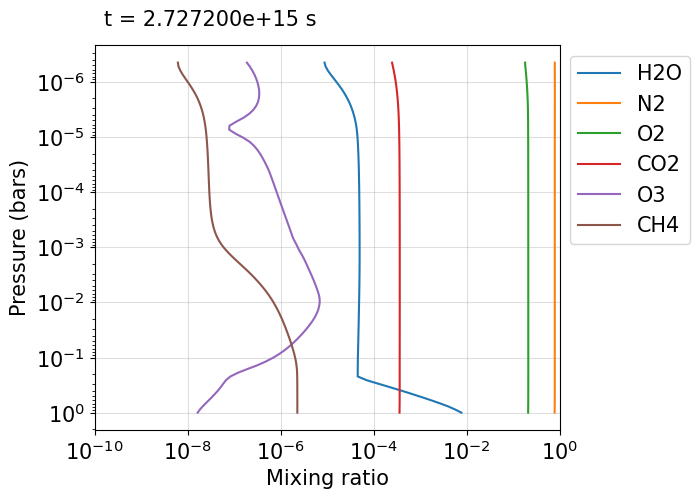

True

In [15]:
def find_steady_state(pc, plot=True):
    pc.initialize_robust_stepper(pc.wrk.usol) 
    while True:
        if plot:
            clear_output(wait=True)
            fig, ax = plot_atmosphere(pc)
            plt.show()
        for i in range(10):
            give_up, converged = pc.robust_step()
            if give_up or converged:
                break
        if give_up or converged:
            break
    return converged

find_steady_state(pc)

Below I change the lower boundary condition of CH4 to a new flux, and integrate to a new equilibrium.

In [16]:
pc.set_lower_bc('CH4',bc_type='flux',flux=1e9)

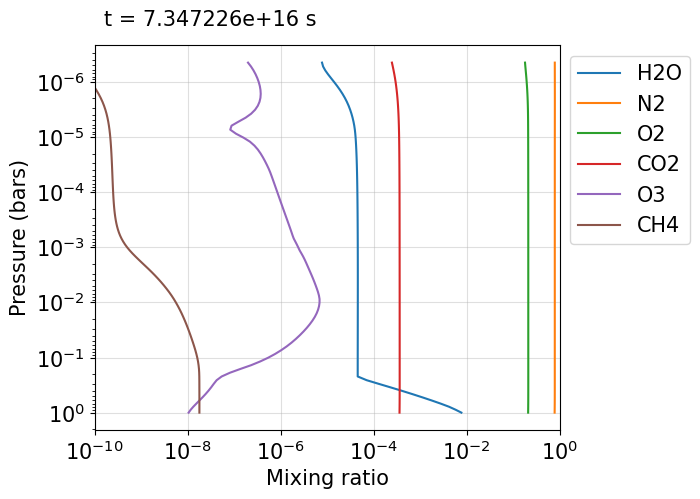

True

In [17]:
find_steady_state(pc)

We can compute the fluxes of gases into and out of the upper and lower boundary of the model to maintain steady-state.

In [18]:
surf, top = pc.gas_fluxes() # all in (molecules/cm2/s)
print(surf['CH4'])

1000000048.9276831


## Production and Loss of a species

We can analyze the production and loss of species like this

In [19]:
pl = pc.production_and_loss('CH4',pc.wrk.usol)
# 3 most important destruction paths for CH4.
print(pl.loss_rx[:3])
# Integrated loss in molecules/cm^2
print(pl.integrated_loss[:3])

['CH4 + OH => CH3 + H2O', 'Cl + CH4 => HCl + CH3', 'O1D + CH4 => CH3 + OH']
[7.66248279e+08 2.21555406e+08 9.54852331e+06]


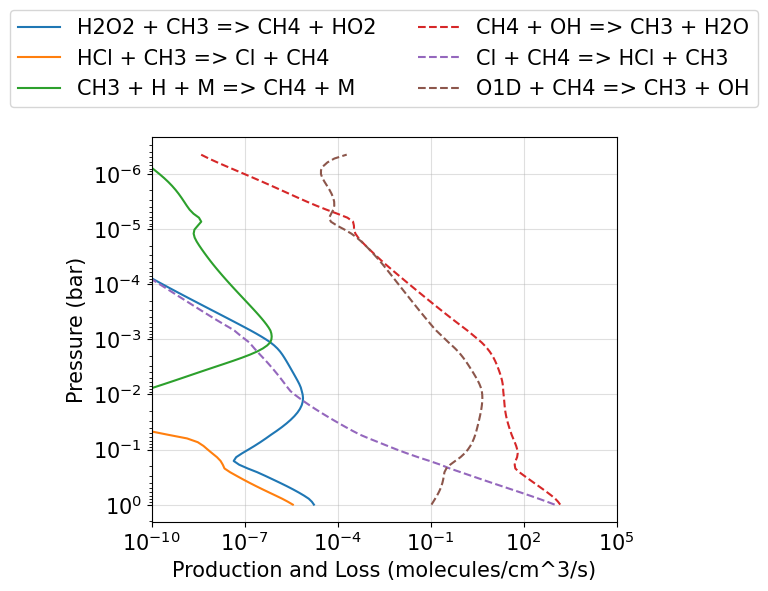

In [20]:
sol = pc.mole_fraction_dict()

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[6,5])

for i in range(3):
    ax.plot(pl.production[:,i],sol['pressure']/1e6,label=pl.production_rx[i])
    
for i in range(3):
    ax.plot(pl.loss[:,i],sol['pressure']/1e6,'--',label=pl.loss_rx[i])

ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_yaxis()
ax.grid(alpha=0.4)
ax.set_ylabel('Pressure (bar)')
ax.set_xlabel('Production and Loss (molecules/cm^3/s)')
ax.set_xlim(1e-10,1e5)
ax.legend(ncol=2,bbox_to_anchor=(0.5,1.05),loc='lower center')
plt.show()

Chemical production and loss are matched mostly by surface fluxes. This does not include chemical rainout, which explains why they are slightly different.

In [21]:
net = np.sum(pl.integrated_production) - np.sum(pl.integrated_loss)
print(net)
surf, top = pc.gas_fluxes()
print(surf['CH4'])

-1000000411.5353962
1000000048.9276831


At any point, you can output the atmosphere to a file using `pc.out2atmosphere_txt`. The model can be reinitialized from this file.

In [22]:
# Write output file
pc.out2atmosphere_txt('atmosphere_out.txt',overwrite=True)

## Changing reaction rates

The file `zahnle_earth.yaml` contains all the reactions and their rates coefficients. There are two main types of reactions (`falloff` and `elementary`) which are standard in kinetics modeling (see https://cantera.org/science/kinetics.html). In both cases rate coefficients have the form

$$k = A T^b \exp(-E_a/T)$$

If you want to use a different reaction rate, or implement a new reaction, then simply make the change in `zahnle_earth.yaml`, and re-initialize the EvoAtmosphere object.

## Changing model data

For the code to opperate, it needs photolysis cross sections and other model data, which is all contained in the package `photochem_clima_data`, which photochem depends on:

In [23]:
from photochem_clima_data import DATA_DIR
print(DATA_DIR)

/Users/nicholas/mambaforge/envs/test/lib/python3.12/site-packages/photochem_clima_data/data


The tutorial `ExtraTutorials/ChangingModelData` describes in detail how you could change the model data. But, the basic steps are

1. Make a copy of the `photochem_clima_data.DATA_DIR` folder
2. Modify the files within the copied directory
3. Initialize the photochemical model, pointing the code to this new, modifying directory

In [24]:
import shutil, os
if not os.path.isdir('./data_copy'):
    _ = shutil.copytree(DATA_DIR, './data_copy')

# Modify file in `data_copy` before initializing code

pc1 = EvoAtmosphere(
    'zahnle_earth.yaml',
    'input/settings.yaml',
    'input/Sun_now.txt',
    'input/atmosphere.txt',
    data_dir='data_copy'
)